In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.stats.circstats import circmean
from functools import reduce
import datetime
import pickle
import time
import plotly.express as px
import numpy as np
import sqlite3

pd.set_option("display.precision", 2)
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
connector = sqlite3.connect("../../Extras/graphs_data.db")
cursor = connector.cursor()

### Auxiliary functions implementation

In [3]:
def build_average_per_minute_arr_from_database_rows(rows):
    """
    input: rows from a database
    output: average heartrate per minute list
    
    The function retrieves rows from a database,
    extracts heart rate dictionary from each row (with keys representing time in seconds and values representing heart rate values).
    It then constructs and returns a list in which each index corresponds to a minute throughout the day,
    containing the average heart rate for that minute.
    """
    lst = [[] for _ in range(24*60+1)]
    for row in rows:
    # dict  = (keys is the time in seconds during day, value is the heartrate value)
        heartrate_samples_dict = pickle.loads(row[3])
        for time_key in heartrate_samples_dict:
            lst[int(time_key*60)].append(heartrate_samples_dict[time_key])
    
    return lst

def build_averages_per_query_lst(sql_query_lst):
    """
    input: a list containing sql queries
    output: list of lists, each list contains the average heartrate value per minute corresponds the sql query data.
    """
    retlist = list()
    for query in sql_query_lst:
        cursor.execute(query)
        rows = cursor.fetchall()
        values_per_minute_lst = build_average_per_minute_arr_from_database_rows(rows)
        average_per_minute_lst = [sum(x)/len(x) if len(x)!=0 else 0 for x in values_per_minute_lst]
        retlist.append(average_per_minute_lst)
    
    return retlist

def print_three_days_comprison_graph(catagory_list, day_before_queries, exam_day_queries, day_after_queries, colors_key_list, exam_time):
    
    assert len(catagory_list) == len(day_before_queries), "catagories and queries lists len should be equal"
    assert len(day_before_queries) == len(exam_day_queries), "queries lists len should be equal"
    assert len(exam_day_queries) == len(day_after_queries), "queries lists len should be equal"

    day_before_avg_list = build_averages_per_query_lst(day_before_queries)
    exam_day_avg_list = build_averages_per_query_lst(exam_day_queries)
    day_after_avg_list = build_averages_per_query_lst(day_after_queries)
    
    averages_list = list()
    for i in range(len(day_before_avg_list)):
        averages_list.append(day_before_avg_list[i] + exam_day_avg_list[i] + day_after_avg_list[i])
        
    indices = list(range(len(averages_list[0])))
                   
     # Plot the values
    plt.figure(figsize=(10,6))

    for i in range(len(catagory_list)):
        plt.plot(indices,averages_list[i], label=catagory_list[i], color=colors_key_list[i])
        
    # Set the x-axis to represent hours
    plt.xticks([i*60 for i in range(0,73,2)], [str(i) for i in range(0,73,2)])
    # set vertical line that descripes exam start time
    if exam_time != 0:
        plt.axvline(x= (exam_time * 60 + 1440), color='grey', linestyle='--', label='Exam start time')


    # Add labels, title, and legend
    plt.xlabel('Hour')
    plt.ylabel('Average-Heartrate')
    plt.title('Average Heart Rate per Minute on the Day Before the Exam, Exam Day, and the Day After the Exam')
    plt.legend()

    # Show the grid
    plt.grid(True)

    # Show the graph
    plt.tight_layout()
    plt.show()

### printing average heartrate per group days before, 9:00 exam days and days after.


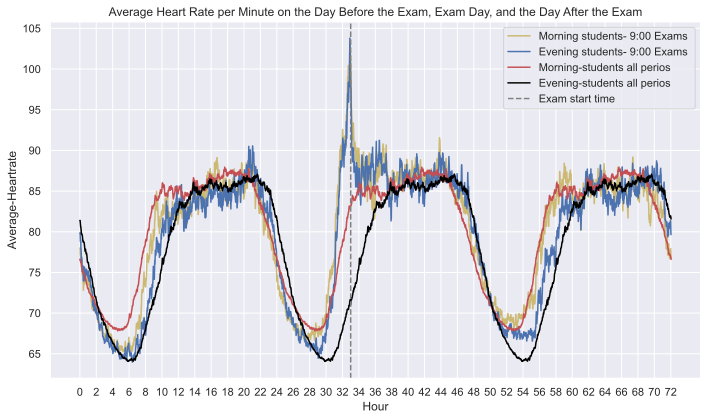

In [4]:
EXAM_TIME = 9

before_dates = "date='2023-02-14' or date='2023-01-30'"
exam_dates = "date='2023-02-15' or date='2023-01-31'"
after_dates = "date='2023-02-16' or date='2023-02-01'"

catagory_list = ['Morning students- 9:00 Exams ', 'Evening students- 9:00 Exams',
                 'Morning-students all perios','Evening-students all perios']

day_before_queries = ["SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300 and "+before_dates,
                      "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200 and "+before_dates,
                      "SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300",
                      "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200"]

exam_day_queries = ["SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300 and "+exam_dates,
                    "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200 and "+exam_dates,
                    "SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300",
                    "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200"]

day_after_queries = ["SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300 and "+after_dates,
                     "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200 and "+after_dates,
                     "SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300",
                     "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200"]

color_list = ['y', 'b','r','black']

print_three_days_comprison_graph(catagory_list, day_before_queries,exam_day_queries, day_after_queries, color_list, exam_time=EXAM_TIME)

### printing average heartrate per group days before, 14:00 exam days and days after.


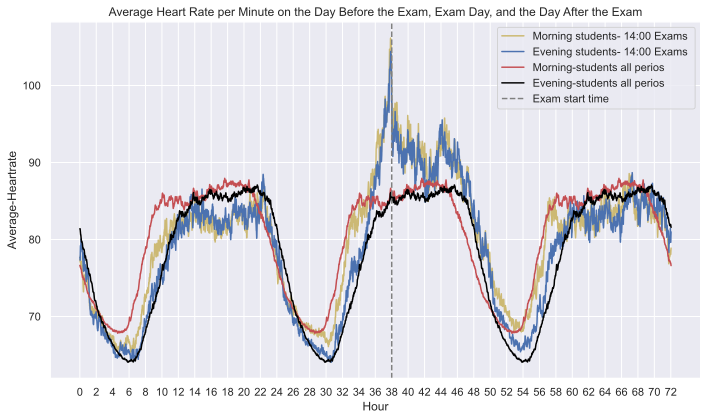

In [5]:
EXAM_TIME = 14

before_dates = "date='2023-02-04' or date='2023-02-08'"
exam_dates = "date='2023-02-05' or date='2023-02-09'"
after_dates = "date='2023-02-06' or date='2023-02-10'"

catagory_list = ['Morning students- 14:00 Exams ', 'Evening students- 14:00 Exams',
                 'Morning-students all perios','Evening-students all perios']

day_before_queries = ["SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300 and "+before_dates,
                      "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200 and "+before_dates,
                      "SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300",
                      "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200"]

exam_day_queries = ["SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300 and "+exam_dates,
                    "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200 and "+exam_dates,
                    "SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300",
                    "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200"]

day_after_queries = ["SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300 and "+after_dates,
                     "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200 and "+after_dates,
                     "SELECT * FROM heartrate_graphs_data WHERE id>=200 and id <300",
                     "SELECT * FROM heartrate_graphs_data WHERE id>=100 and id <200"]

color_list = ['y', 'b','r','black']

print_three_days_comprison_graph(catagory_list, day_before_queries,exam_day_queries, day_after_queries, color_list, exam_time=EXAM_TIME)